In [9]:
!pwd

/enadisk/maison/sage2016/weber/PycharmProjects/EXOTIC/notebooks/clean


In [13]:
import os
import sys
import pandas as pd
import numpy as np
sys.path.append("/home/weber/PycharmProjects/EXOTIC/clean/src/")
from statannot import add_stat_annotation

from tqdm import tqdm
tqdm.pandas()

pd.options.mode.chained_assignment = None  # default='warn'

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mc
from matplotlib.colors import LogNorm
import json
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D   
from clean.src.utils import utils


## YAML FILES CONFIG
yaml = utils.load_config_file(config_file="../../clean/src/config_clean_clean.yaml")

# JSON
dicts = json.load(open("../../clean/src/config/EXOTIC_config.json"))


import matplotlib.font_manager as font_manager

font_dirs = ['/home/weber/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.weight'] = 'light'

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.


In [17]:
concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location'])
concat_df_distribution_ratios

,Prct,Total/Ratio,Cutoff,Nb_bin,Up/Down,Bin_num,value
0,0.50,Total,0.17,3,up,1,5571.000000
1,0.50,Ratio,0.17,3,up,1,35.261725
2,0.55,Total,0.19,3,up,1,5114.000000
3,0.55,Ratio,0.19,3,up,1,35.440055
4,0.60,Total,0.22,3,up,1,4375.000000
...,...,...,...,...,...,...,...
1667,0.90,Ratio,0.56,20,down,20,10.492360
1668,0.95,Total,0.72,20,down,20,171.000000
1669,0.95,Ratio,0.72,20,down,20,11.640572
1670,0.99,Total,0.94,20,down,20,29.000000


In [18]:
concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == 10) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]

,Prct,Total/Ratio,Cutoff,Nb_bin,Up/Down,Bin_num,value
353,0.50,Ratio,0.17,10,up,1,13.568336
355,0.55,Ratio,0.19,10,up,1,13.657313
357,0.60,Ratio,0.22,10,up,1,13.689297
359,0.65,Ratio,0.24,10,up,1,13.660397
361,0.70,Ratio,0.28,10,up,1,13.918990
...,...,...,...,...,...,...,...
563,0.80,Ratio,0.36,10,up,10,14.287888
565,0.85,Ratio,0.43,10,up,10,14.500106
567,0.90,Ratio,0.51,10,up,10,14.432348
569,0.95,Ratio,0.69,10,up,10,14.229765


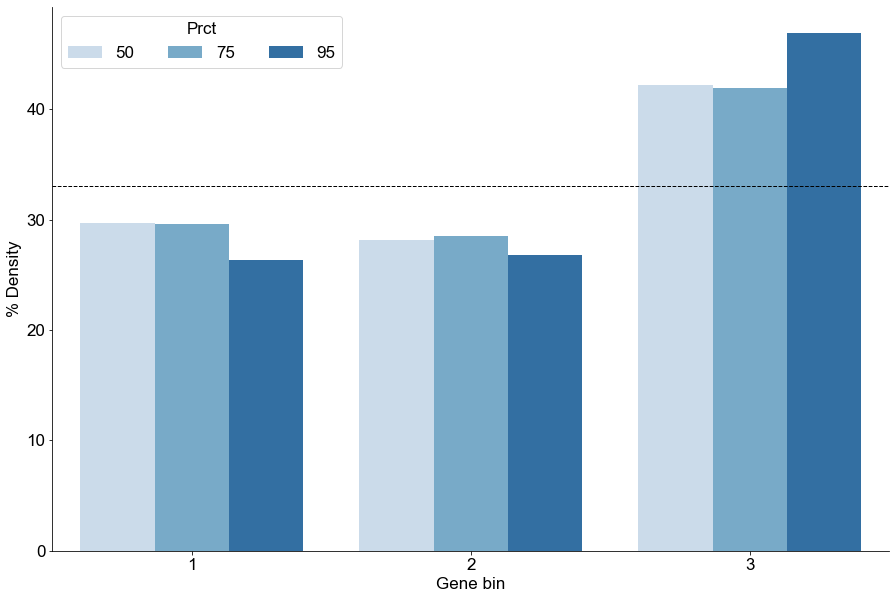

In [46]:
nb_bin = 3

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location'])
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['Prct'].isin([50,75,95])]
# concat_df_distribution_ratios = concat_df_distribution.reset_index()
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['level_1'] == 'Ratio']
# concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='level_0', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
# concat_df_distribution_ratios.head()

from colour import Color
# Color('red')
# palette = ['#b1bacf', '#7687ab', '#3c5488']
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Prct', palette='Blues')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(title='Prct', ncol=3)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


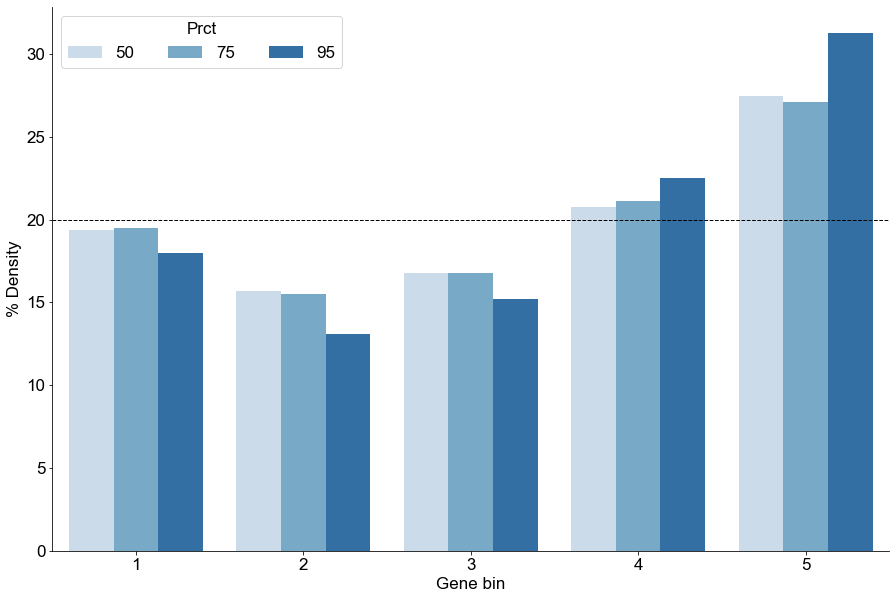

In [45]:
nb_bin = 5

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location'])
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['Prct'].isin([50,75,95])]

# concat_df_distribution_ratios = concat_df_distribution.reset_index()
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['level_1'] == 'Ratio']
# concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='level_0', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
# concat_df_distribution_ratios.head()

from colour import Color
# Color('red')
# palette = ['#b1bacf', '#7687ab', '#3c5488']
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Prct', palette='Blues')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(title='Prct', ncol=3)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


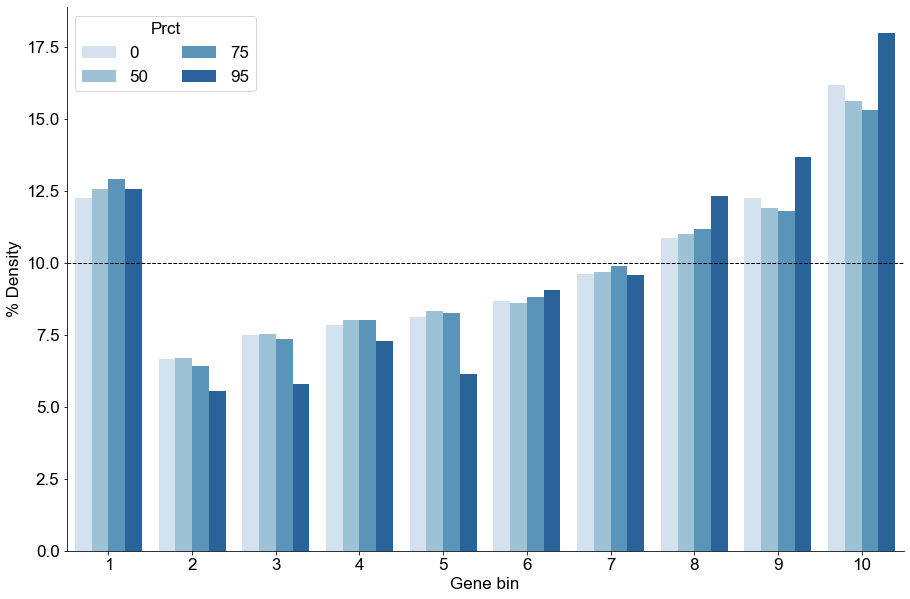

In [57]:
nb_bin = 10

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location'])
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['Prct'].isin([0, 50,75,95])]

# concat_df_distribution_ratios = concat_df_distribution.reset_index()
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['level_1'] == 'Ratio']
# concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='level_0', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
# concat_df_distribution_ratios.head()

from colour import Color
# Color('red')
# palette = ['#b1bacf', '#7687ab', '#3c5488']
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Prct', palette='Blues')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(title='Prct', ncol=2)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


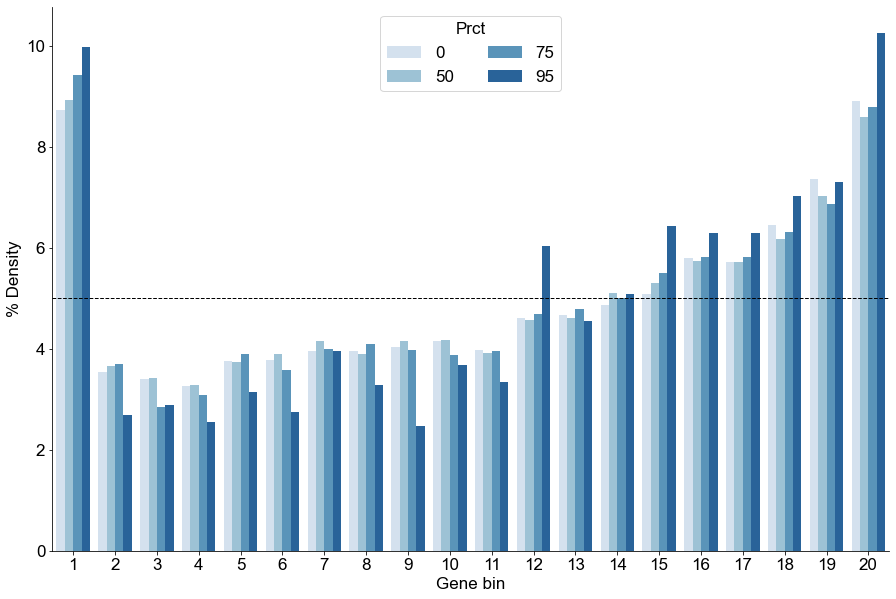

In [51]:
nb_bin = 20

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location'])
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'up') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['Prct'].isin([0, 50,75,95])]

# concat_df_distribution_ratios = concat_df_distribution.reset_index()
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['level_1'] == 'Ratio']
# concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='level_0', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
# concat_df_distribution_ratios.head()

from colour import Color
# Color('red')
# palette = ['#b1bacf', '#7687ab', '#3c5488']
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Prct', palette='Blues')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(title='Prct', ncol=2)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


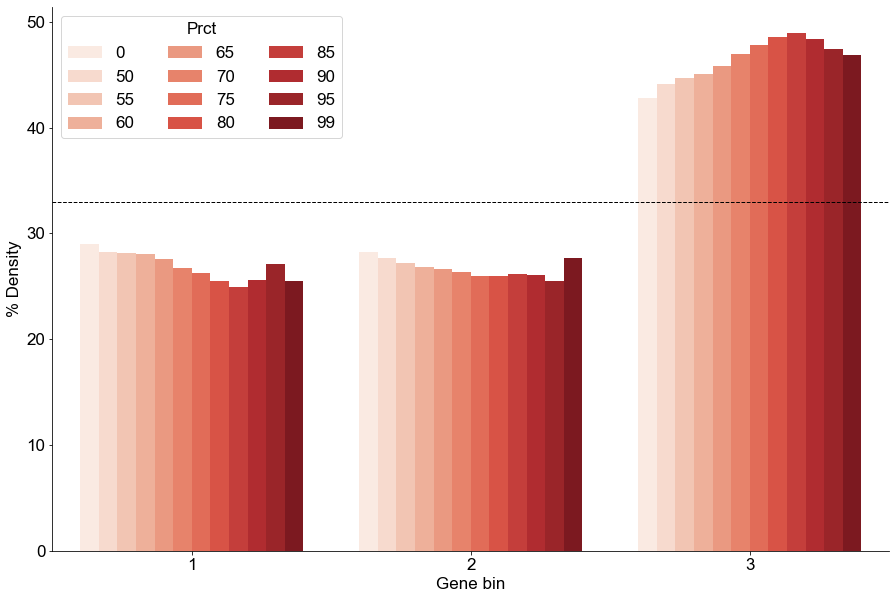

In [53]:
nb_bin = 3

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location'])
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['Prct'].isin([0, 50,75,95])]

# concat_df_distribution_ratios = concat_df_distribution.reset_index()
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['level_1'] == 'Ratio']
# concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='level_0', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
# concat_df_distribution_ratios.head()

from colour import Color
# Color('red')
# palette = ['#b1bacf', '#7687ab', '#3c5488']
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Prct', palette='Reds')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(title='Prct', ncol=3)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


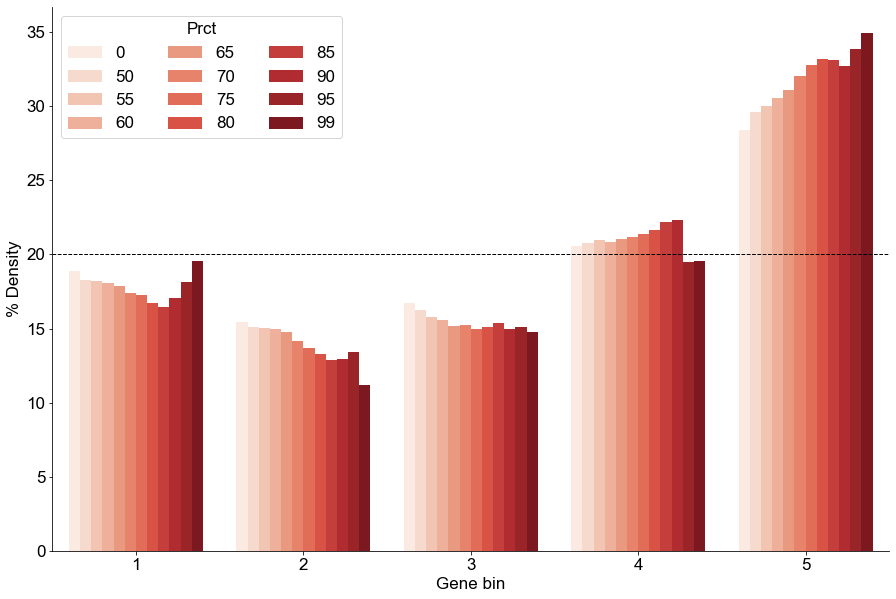

In [54]:
nb_bin = 5

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location'])
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['Prct'].isin([0, 50,75,95])]

# concat_df_distribution_ratios = concat_df_distribution.reset_index()
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['level_1'] == 'Ratio']
# concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='level_0', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
# concat_df_distribution_ratios.head()

from colour import Color
# Color('red')
# palette = ['#b1bacf', '#7687ab', '#3c5488']
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Prct', palette='Reds')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(title='Prct', ncol=3)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


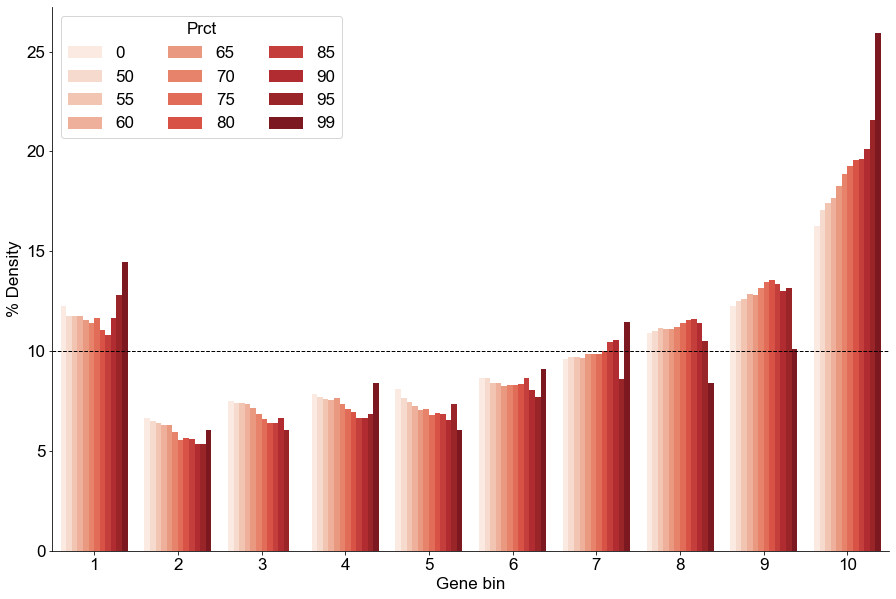

In [55]:
nb_bin = 10

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location'])
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['Prct'].isin([0, 50,75,95])]

# concat_df_distribution_ratios = concat_df_distribution.reset_index()
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['level_1'] == 'Ratio']
# concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='level_0', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
# concat_df_distribution_ratios.head()

from colour import Color
# Color('red')
# palette = ['#b1bacf', '#7687ab', '#3c5488']
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Prct', palette='Reds')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(title='Prct', ncol=3)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


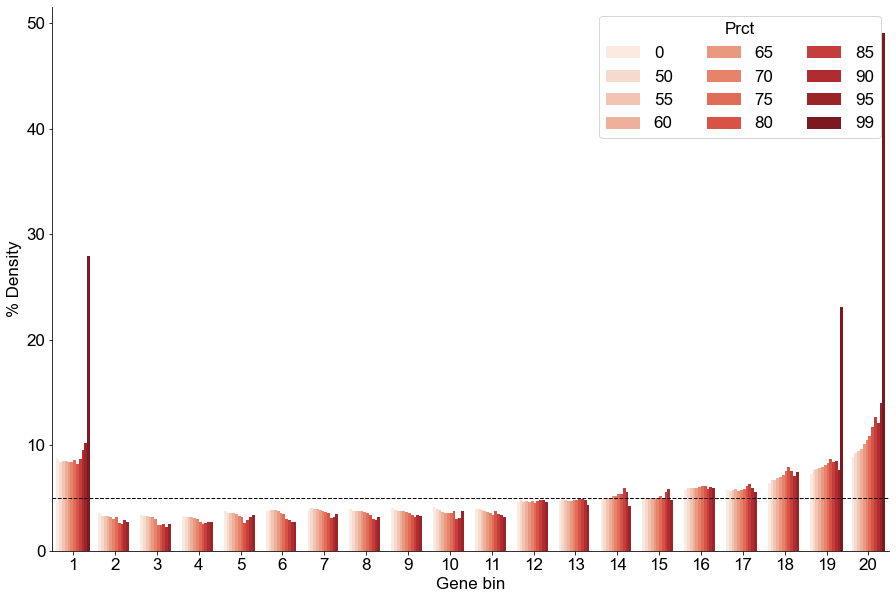

In [59]:
yaml = utils.load_config_file(config_file="../../clean/src/config_clean_clean.yaml")


nb_bin = 20

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['exons_location'])
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].round(0).astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Up/Down'] == 'down') & (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['Prct'].isin([0, 50,75,95])]

# concat_df_distribution_ratios = concat_df_distribution.reset_index()
# concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['level_1'] == 'Ratio']
# concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='level_0', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
# concat_df_distribution_ratios.head()

from colour import Color
# Color('red')
# palette = ['#b1bacf', '#7687ab', '#3c5488']
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Prct', palette='Reds')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(title='Prct', ncol=3)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


No handles with labels found to put in legend.


   Total/Ratio  Bin_num      value  Nb_bin
17       Ratio        1   9.629632      10
19       Ratio        2   9.675371      10
21       Ratio        3   8.921024      10
23       Ratio        4   9.610849      10
25       Ratio        5  10.482764      10
27       Ratio        6  11.105666      10
29       Ratio        7  10.472522      10
31       Ratio        8  10.503415      10
33       Ratio        9   9.264852      10
35       Ratio       10  10.333903      10


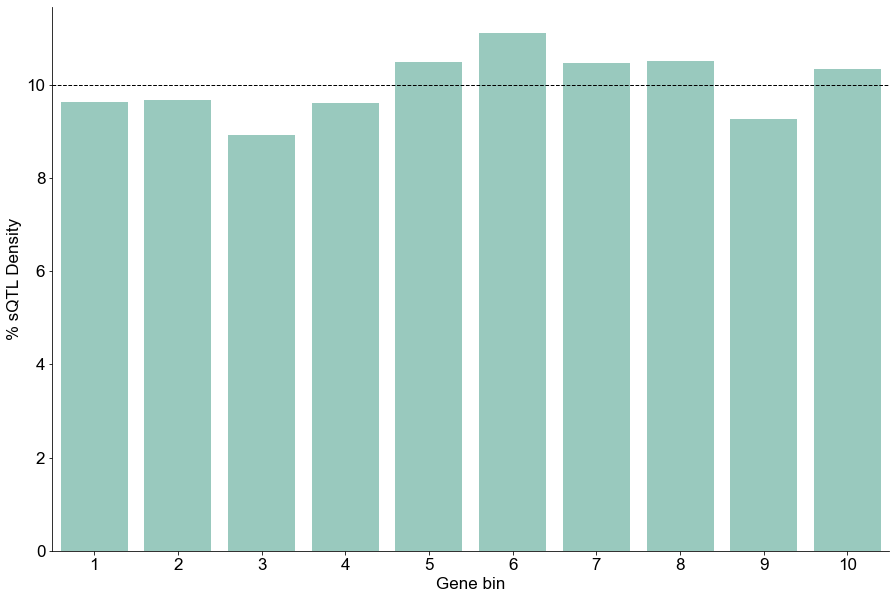

In [70]:
yaml = utils.load_config_file(config_file="../../clean/src/config_clean_clean.yaml")


nb_bin = 10

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['sqtls_location'])
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[(concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio')]

print(concat_df_distribution_ratios)

from colour import Color
# Color('red')
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value',  palette=['#91D1C2'])
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% sQTL Density')
ax.legend().remove()
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


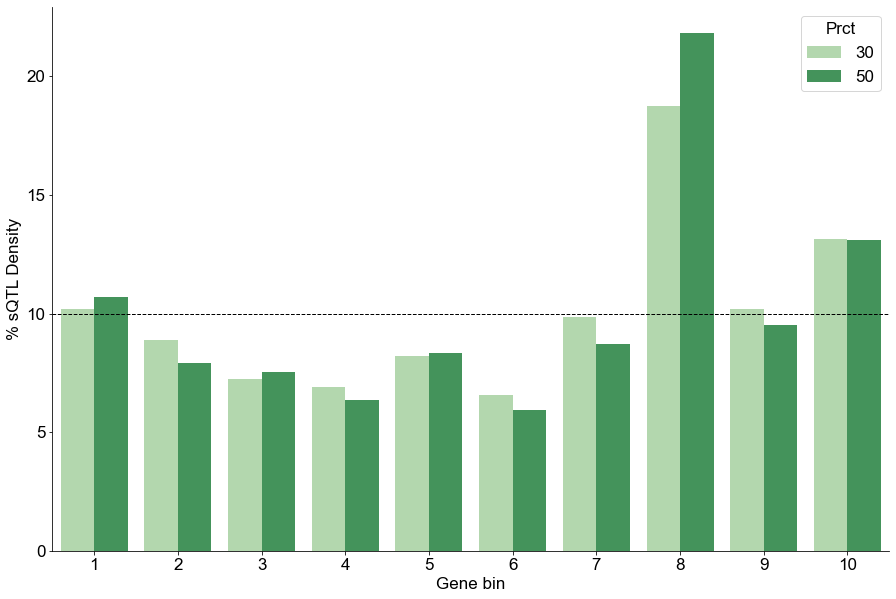

In [79]:
yaml = utils.load_config_file(config_file="../../clean/src/config_clean_clean.yaml")


nb_bin = 10

concat_df_distribution_ratios = pd.read_excel(yaml['6_sQTLs']['Figures_data']['match_sqtls_location'])
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'] * 100
concat_df_distribution_ratios['Prct'] = concat_df_distribution_ratios['Prct'].astype(int)
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[
    (concat_df_distribution_ratios['Nb_bin'] == nb_bin) & (concat_df_distribution_ratios['Total/Ratio'] == 'Ratio') & 
    (concat_df_distribution_ratios['Type'] == True) & (concat_df_distribution_ratios['Up/Down'] == "down")
]
# concat_df_distribution_ratios.Type.value_counts()

# from colour import Color
# # Color('red')
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='Bin_num', y='value', hue='Prct',  palette='Greens')
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% sQTL Density')
ax.legend(title='Prct')
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
